In [1]:
import numpy as np
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
from scipy.signal import medfilt


In [2]:
# Define the function to read a specific trace from SEG-Y file
def read_segy(filename):
    st = _read_segy(filename)
    data = [trace.data for trace in st.traces]
    trace_headers = [trace.header for trace in st.traces]
    general_header = st.textual_file_header
    return data, trace_headers, general_header

# Select the SEG-Y file
filename = 'VSPmodel1.segy'  # Provide the path to your SEG-Y file

Data, SegyTraceHeaders, SegyHeader = read_segy(filename)
Data = np.array(Data)

# # Apply median filter to each trace
filtered_data = np.array([medfilt(trace, kernel_size=1) for trace in Data])
#filtered_data = np.array(trace)

len(filtered_data)

70

In [3]:
# Define the function to pick the first break in a trace
def pick_first_break(trace, threshold, tmin, tmax):
    c = 0
    s = 0
    avg = 0

    for num in range(tmin, tmax - 1):  # Adjusted range to avoid going out of bounds
        c += 1
        s += abs(trace[num])
        avg = s / c

        if abs(trace[num + 1]) > threshold * avg:
            return num
    
    return tmax

In [4]:
 #Set the inputs for first break picking
#threshold = 0.5
threshold =  np.arange(1,21,1)
#tmin = 5
tmin = np.arange(1,21,1)
#tmax = 2000
tmax = np.arange(100,2001,100)

In [33]:
len(tmax)

20

In [7]:
picked_times=[]

for i in range(len(tmin)):
    for j in range(len(filtered_data)):
        picked_times.append(pick_first_break(filtered_data[j, :],threshold[i],tmin[i],tmax[i]))
    
picked_times

filtered_picked_times = medfilt(picked_times, kernel_size=9)

filtered_picked_times.shape

(1400,)

## 70 trace each have 20 tmin, tmax, thersold 

for each tmin , tmax & thersold you have to plot .

for tmin-1,tmax-1,thersold-1

In [17]:
for trace_number, picked_time in enumerate(filtered_picked_times):
    print(trace_number, picked_time)

0 1
1 20
2 40
3 72
4 100
5 100
6 100
7 100
8 100
9 100
10 100
11 100
12 100
13 100
14 100
15 100
16 100
17 100
18 100
19 100
20 100
21 100
22 100
23 100
24 100
25 100
26 100
27 100
28 100
29 100
30 100
31 100
32 100
33 100
34 100
35 100
36 100
37 100
38 100
39 100
40 100
41 100
42 100
43 100
44 100
45 100
46 100
47 100
48 100
49 100
50 100
51 100
52 100
53 100
54 100
55 100
56 100
57 100
58 100
59 100
60 100
61 100
62 100
63 100
64 100
65 100
66 100
67 100
68 100
69 100
70 100
71 100
72 100
73 100
74 111
75 152
76 195
77 200
78 200
79 200
80 200
81 200
82 200
83 200
84 200
85 200
86 200
87 200
88 200
89 200
90 200
91 200
92 200
93 200
94 200
95 200
96 200
97 200
98 200
99 200
100 200
101 200
102 200
103 200
104 200
105 200
106 200
107 200
108 200
109 200
110 200
111 200
112 200
113 200
114 200
115 200
116 200
117 200
118 200
119 200
120 200
121 200
122 200
123 200
124 200
125 200
126 200
127 200
128 200
129 200
130 200
131 200
132 200
133 200
134 200
135 200
136 200
137 200
138 200
139

TypeError: only integer scalar arrays can be converted to a scalar index

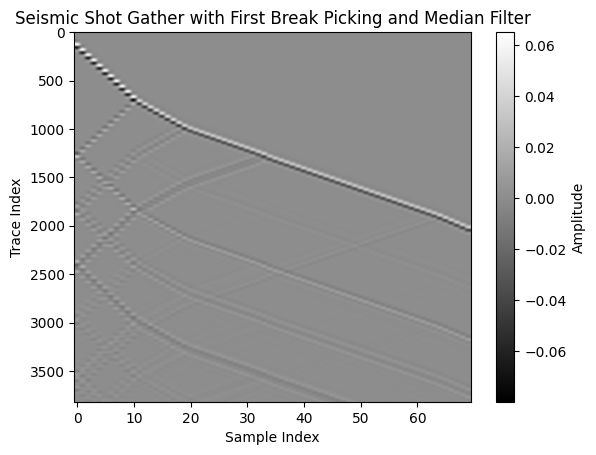

In [21]:
trace_numbers_normalized = np.arange(len(filtered_data)) / len(filtered_data)

trace_numbers_normalized.shape

plt.imshow(filtered_data.T, cmap='gray', aspect='auto')
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('Seismic Shot Gather with First Break Picking and Median Filter')

for i in range(tmin):    
    # Plot picked times on the seismic shot gather
    for trace_number, picked_time in enumerate(filtered_picked_times):
        plt.axhline(y=picked_time, xmin=trace_number / len(filtered_data), xmax=(trace_number + 1) / len(filtered_data),
                    color='green', linestyle='-', linewidth=2)
    plt.show()

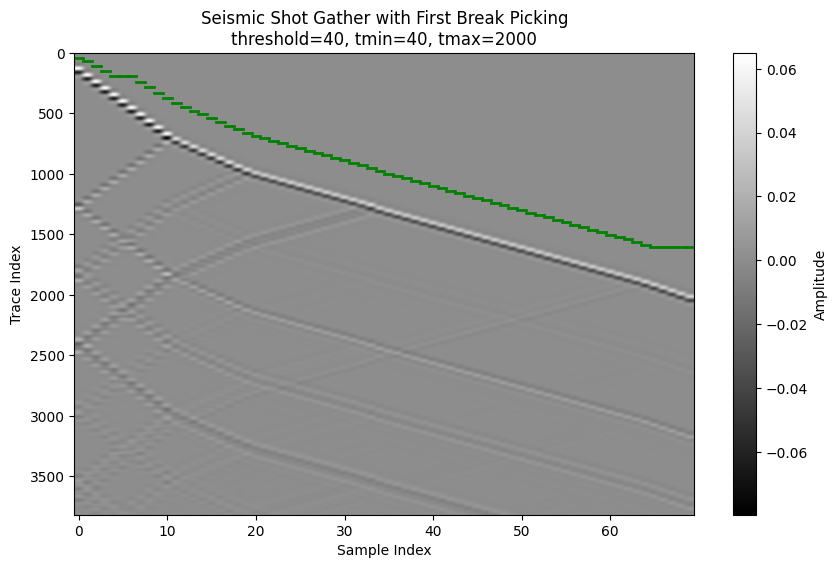

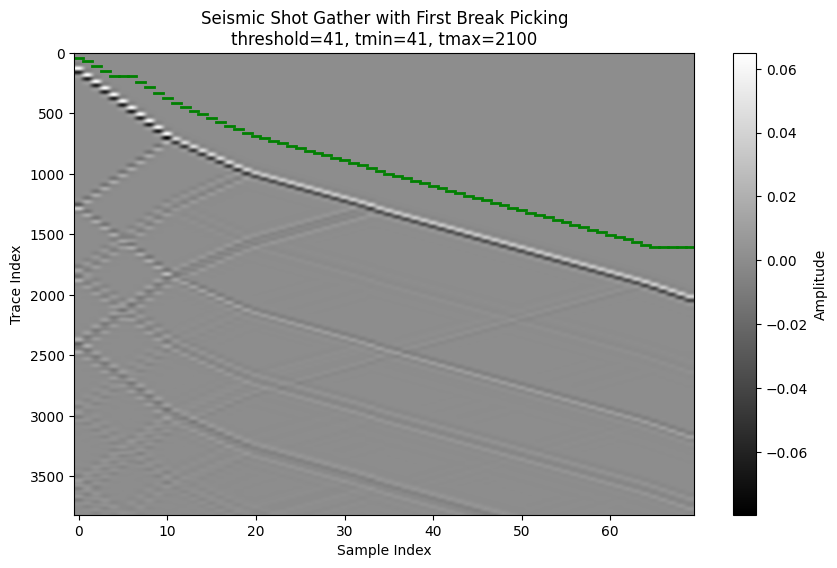

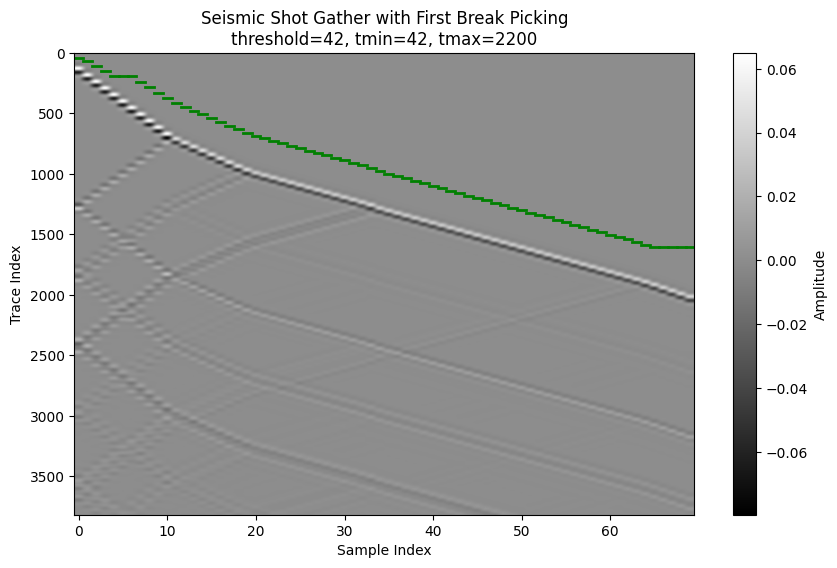

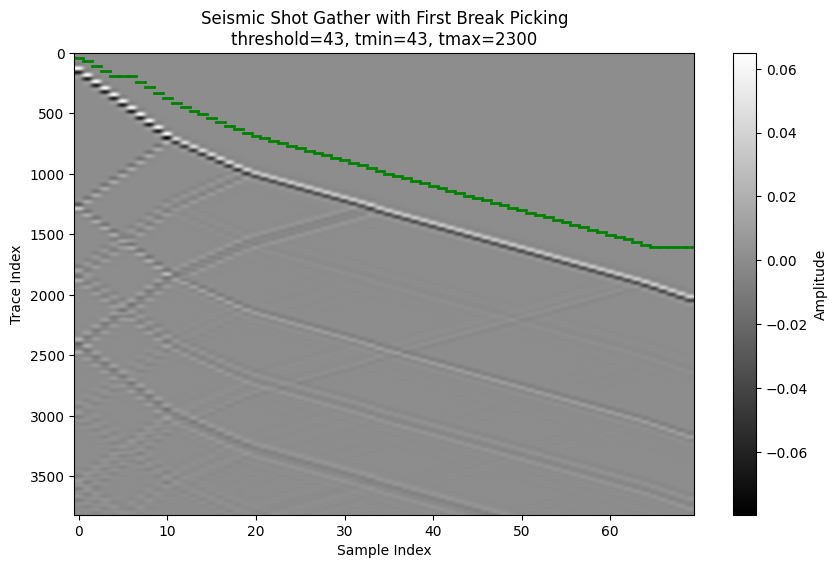

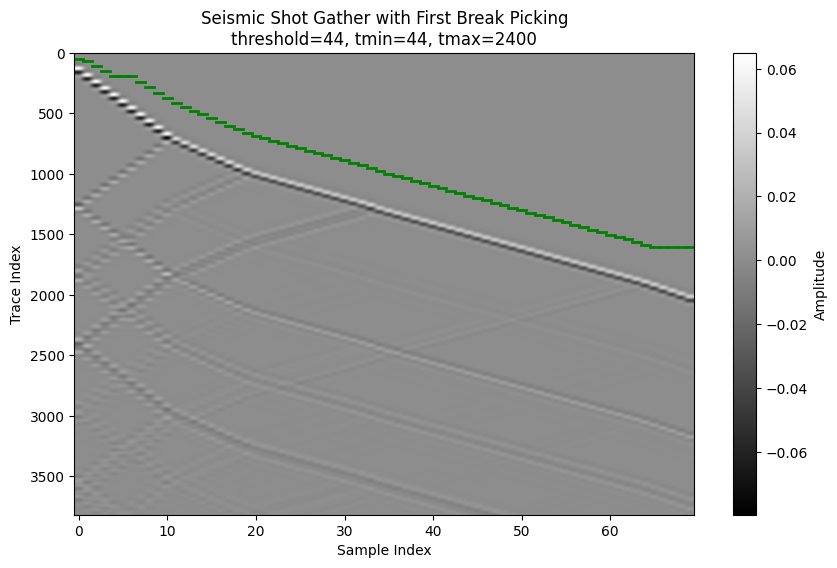

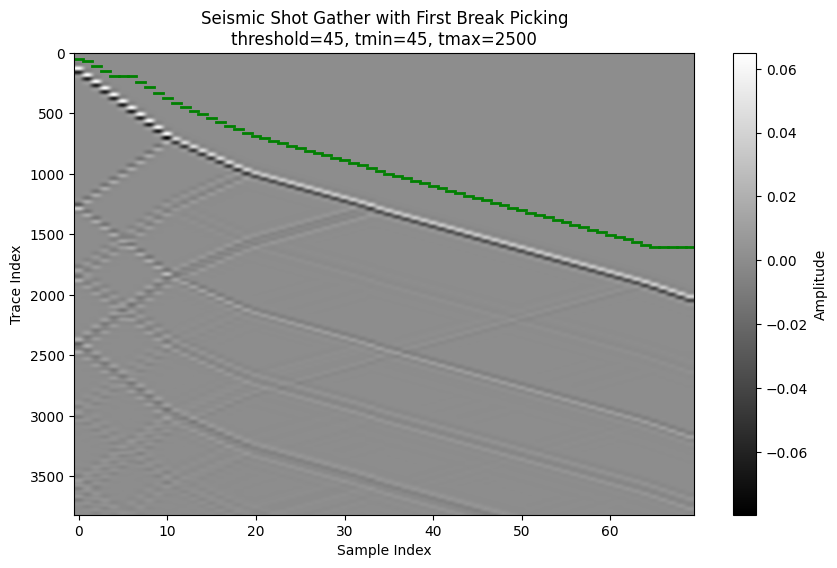

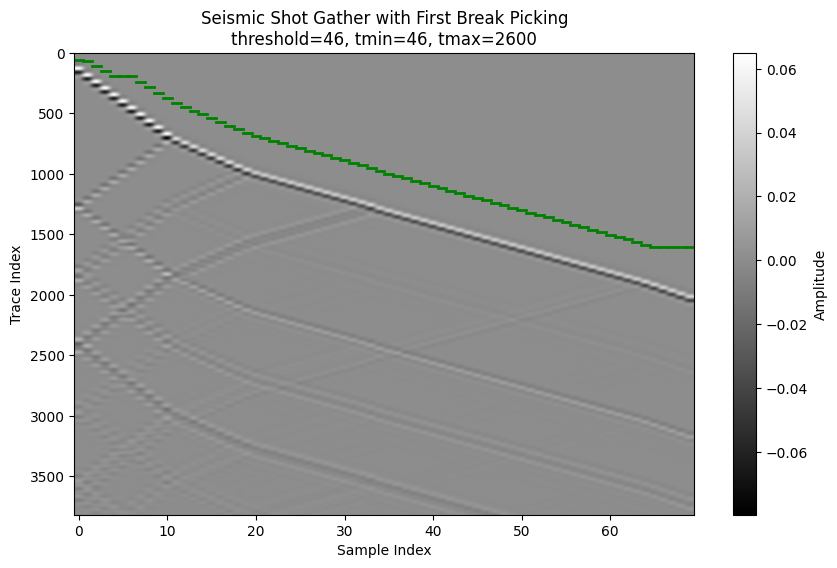

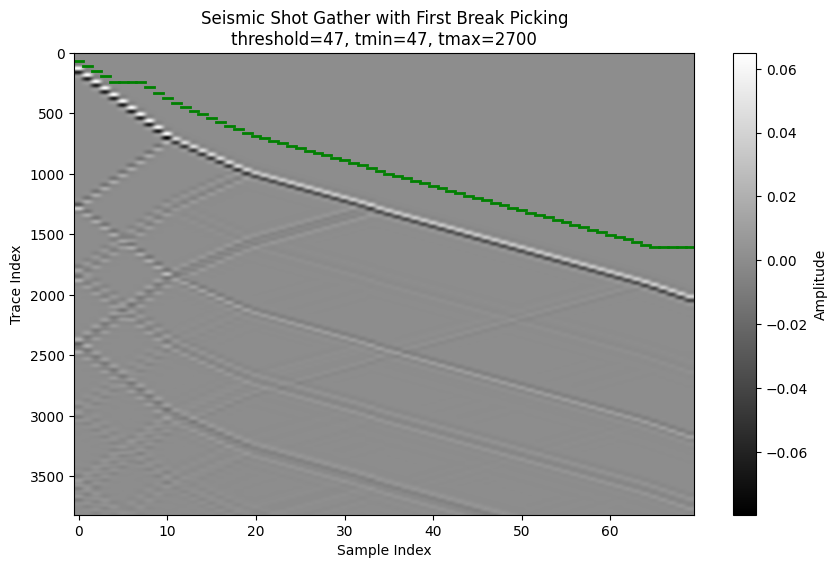

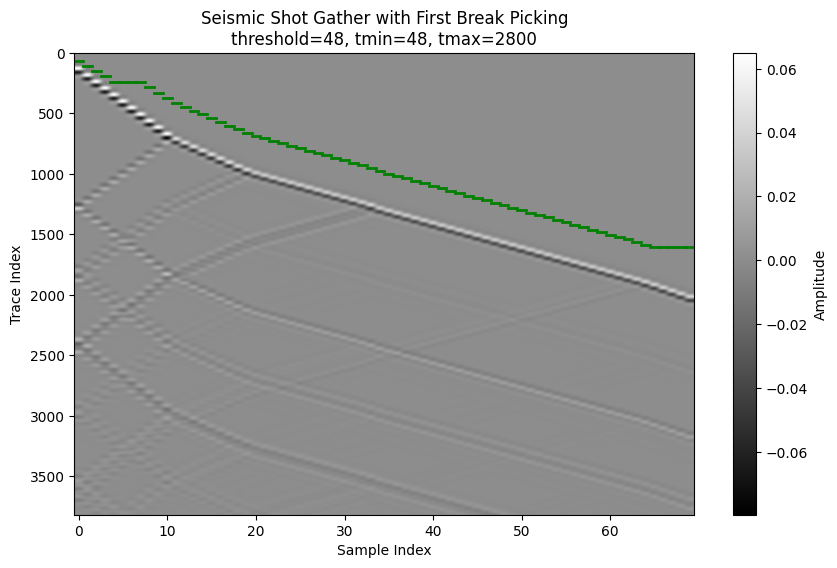

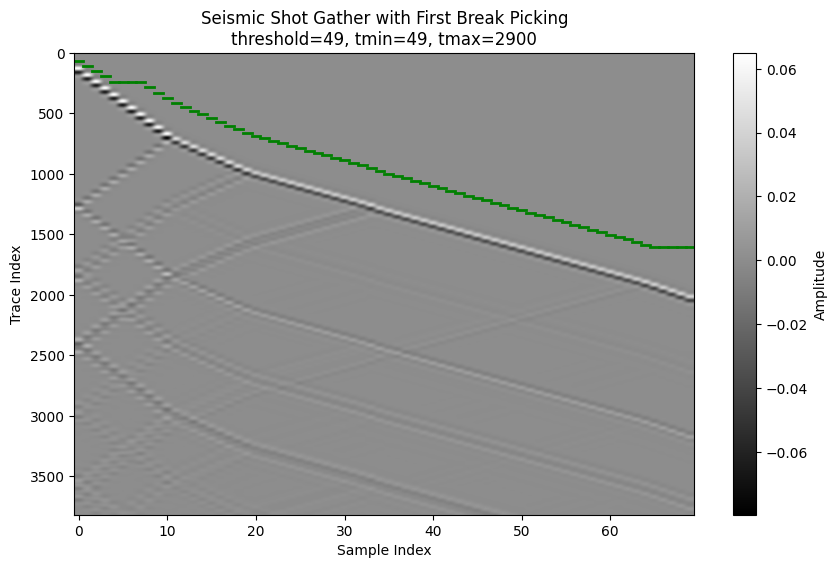

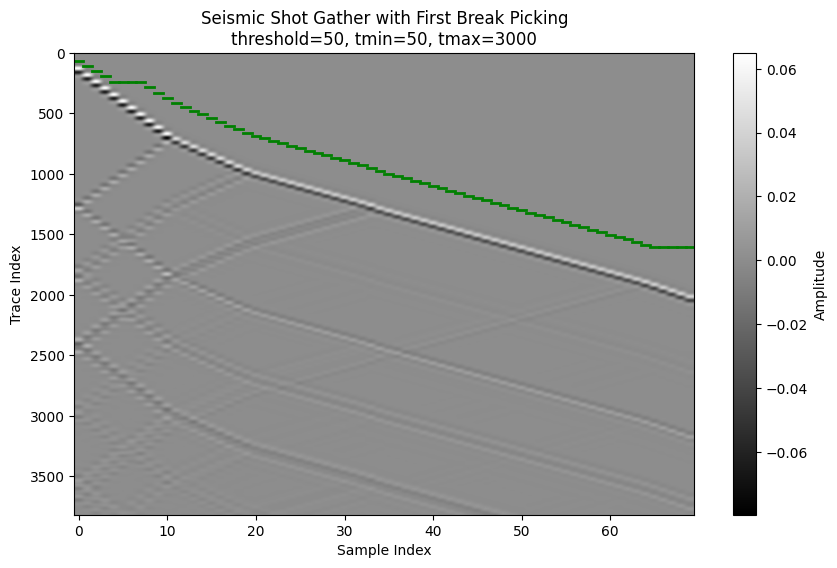

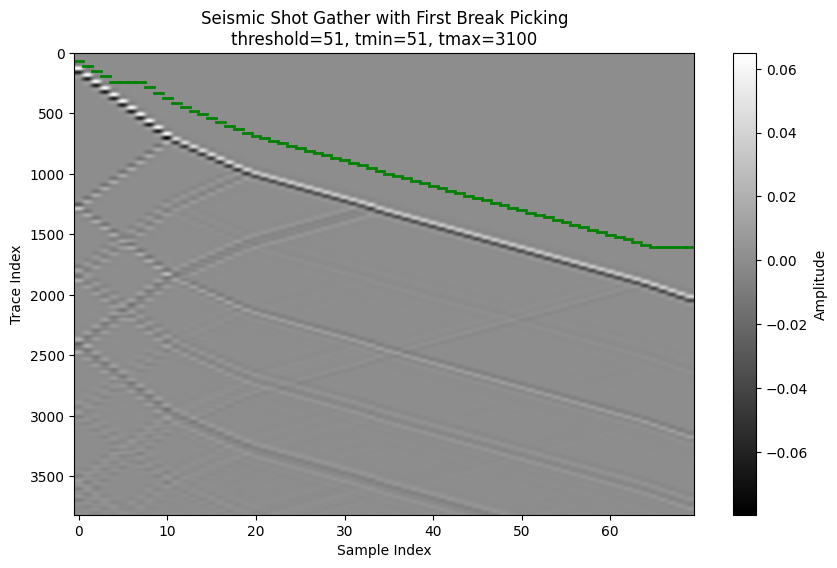

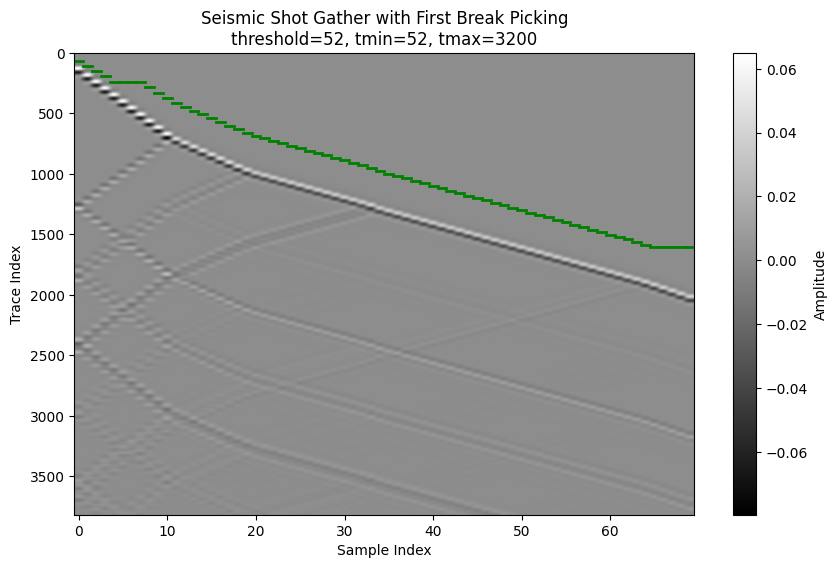

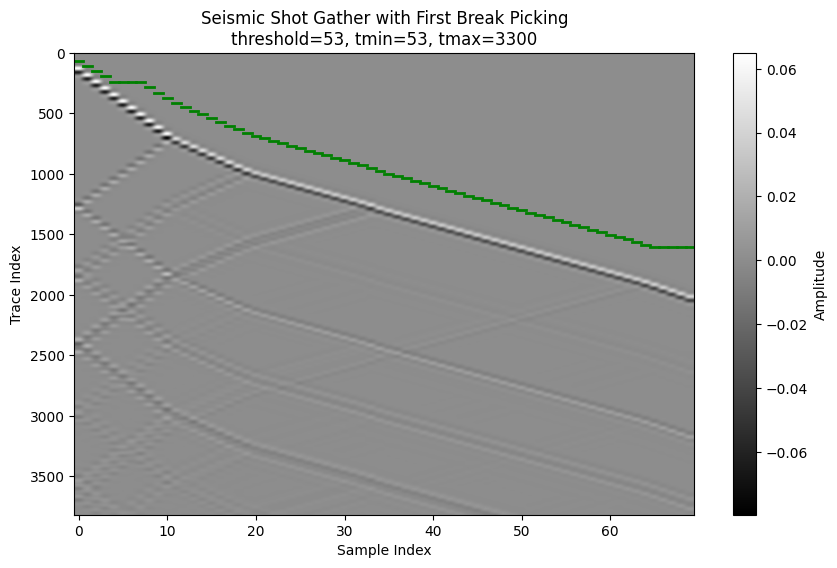

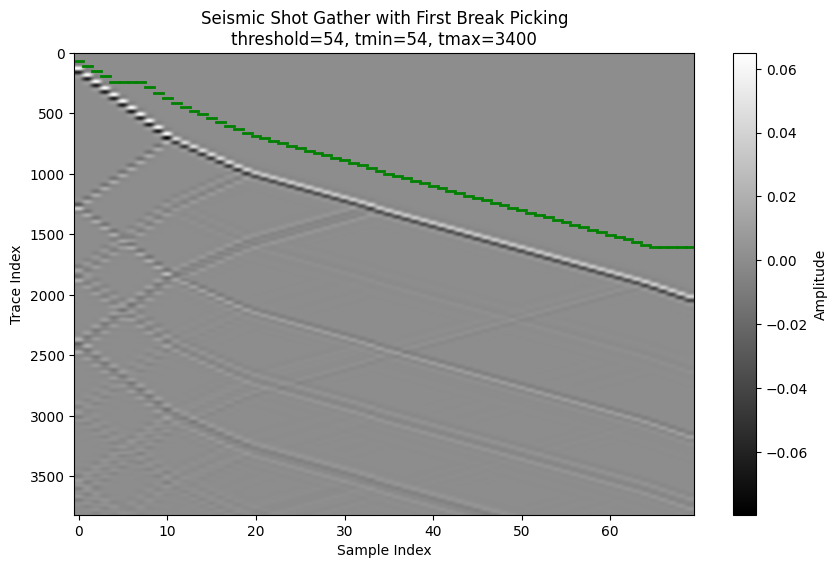

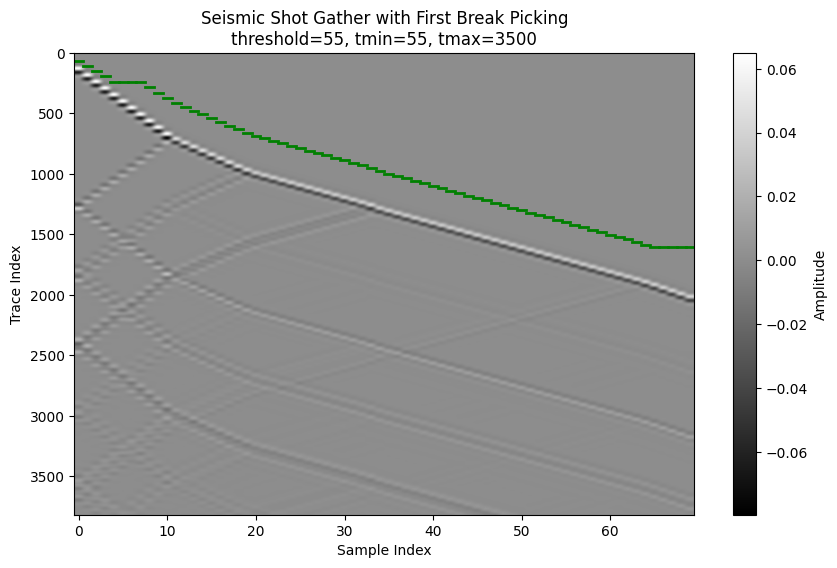

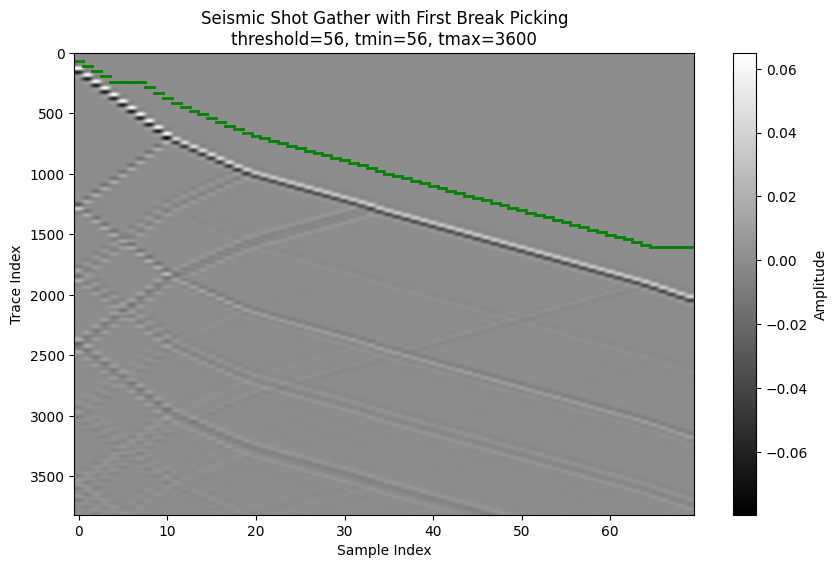

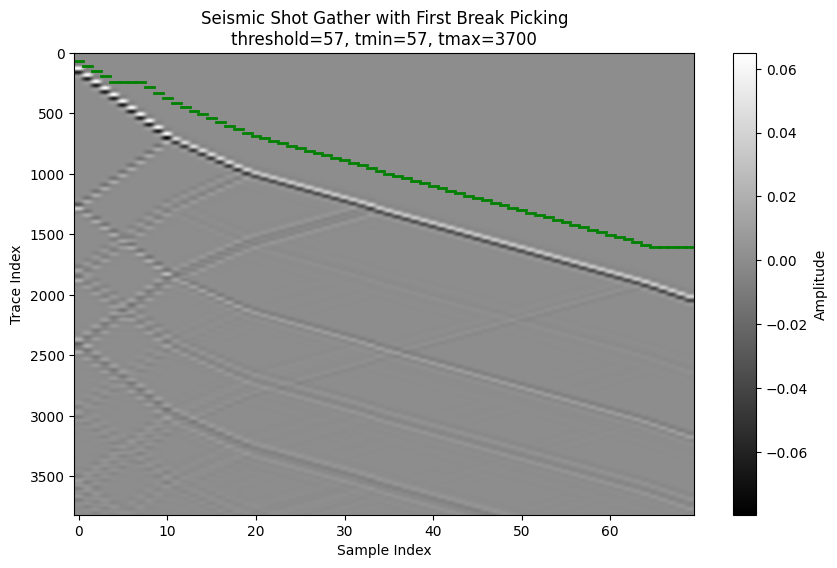

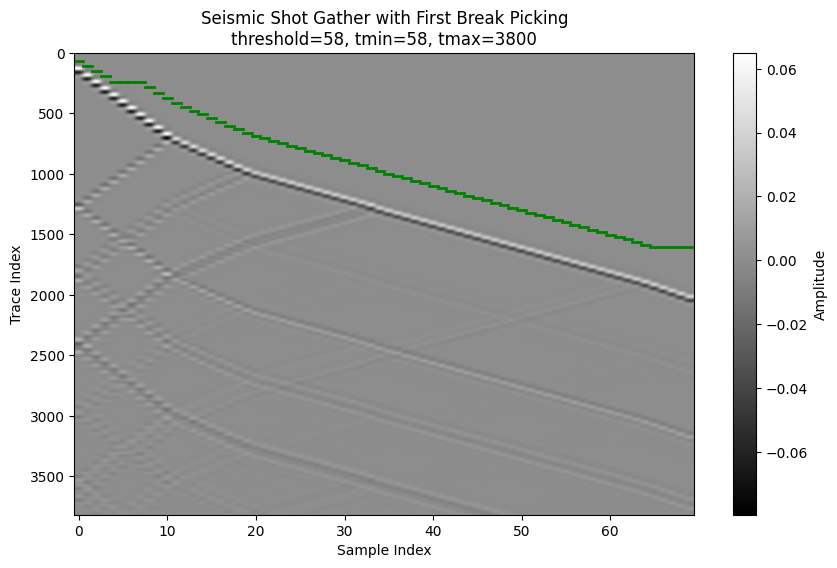

IndexError: index 3818 is out of bounds for axis 0 with size 3818

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Assuming filtered_data is already defined
# Define the ranges
thresholds = np.arange(40, 61, 1)
tmins = np.arange(40, 61, 1)
tmaxs = np.arange(2000, 4001, 100)

# Generate the graphs
for idx in range(20):  # Assuming you want to plot 20 graphs
    picked_times = []
    
    # Loop through each trace and pick the first break time
    for trace_index in range(len(filtered_data)):
        picked_time = pick_first_break(
            filtered_data[trace_index, :], 
            thresholds[idx % len(thresholds)], 
            tmins[idx % len(tmins)], 
            tmaxs[idx % len(tmaxs)]
        )
        picked_times.append(picked_time)
    
    # Apply median filter to the picked times
    filtered_picked_times = medfilt(picked_times, kernel_size=9)
    
    # Normalize the trace numbers
    #trace_numbers_normalized = np.arange(len(filtered_data)) / len(filtered_data)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.imshow(filtered_data.T, cmap='gray', aspect='auto')
    plt.colorbar(label='Amplitude')
    plt.xlabel('Sample Index')
    plt.ylabel('Trace Index')
    plt.title(f'Seismic Shot Gather with First Break Picking\n'
              f'threshold={thresholds[idx % len(thresholds)]}, '
              f'tmin={tmins[idx % len(tmins)]}, '
              f'tmax={tmaxs[idx % len(tmaxs)]}')
    
    # Plot picked times on the seismic shot gather
    for trace_number, picked_time in enumerate(filtered_picked_times):
        plt.axhline(y=picked_time, xmin=trace_number / len(filtered_data), 
                    xmax=(trace_number + 1) / len(filtered_data),
                    color='green', linestyle='-', linewidth=2)
    
    # Show each plot
    plt.show()


In [ ]:
import numpy as np
len(np.arange(100,2001,100))

20

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np

a = np.random.random(100)
b = np.random.random(200)


distance, path = fastdtw(a, dist=euclidean)
print(f"DTW Distance: {distance}")

TypeError: fastdtw() missing 1 required positional argument: 'y'

In [ ]:

distance, path = fastdtw(a, b, dist=euclidean)
print(f"DTW Distance: {distance}")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

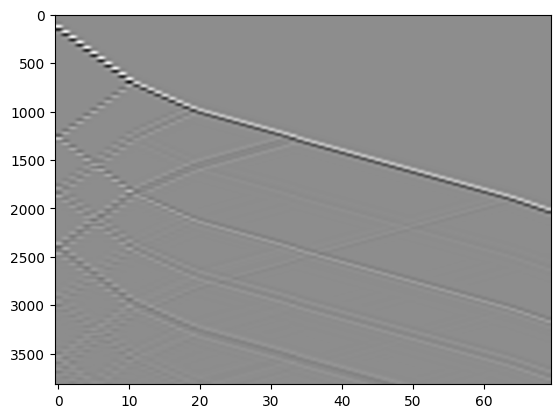

In [ ]:
import numpy as np
from obspy.io.segy.segy import _read_segy
import matplotlib.pyplot as plt
from scipy.signal import medfilt


# Define the function to read a specific trace from SEG-Y file
def read_segy(filename):
    st = _read_segy(filename)
    data = [trace.data for trace in st.traces]
    trace_headers = [trace.header for trace in st.traces]
    general_header = st.textual_file_header
    return data, trace_headers, general_header

# Select the SEG-Y file
filename = 'VSPmodel1.segy'  # Provide the path to your SEG-Y file

Data, SegyTraceHeaders, SegyHeader = read_segy(filename)
Data = np.array(Data)

# # Apply median filter to each trace
filtered_data = np.array([medfilt(trace, kernel_size=1) for trace in Data])
#filtered_data = np.array(trace)
 
# import pandas lib as pd
import pandas as pd
df = pd.read_excel('FB_VSPMODEL1.xlsx') #, sheet_name='Sheet1')
#print(df.shape)
# Get the values from the first (and only) row
row_list = df.iloc[0,:].tolist()

def pick_first_break(tmax):
    

    for i in range(len(row_list)):  # Adjusted range to avoid going out of bounds
        tmax = row_list[i]
    return tmax

picked_times = []

# Loop through all traces
for i in range(len(filtered_data)):
    # Pick the time of the first break for each trace
    picked_time = pick_first_break(filtered_data[i, :])
    picked_times.append(picked_time)



# Apply median filter to the picked times
filtered_picked_times = medfilt(picked_times, kernel_size=9)
#filtered_picked_times = medfilt(fb11, kernel_size=9)
# Plot the seismic shot gather with the median filter
trace_numbers_normalized = np.arange(len(filtered_data)) / len(filtered_data)
#Matplotlib.pyplot.clim(filtered_data.T, cmap='greyscale', aspect='auto')
plt.imshow(filtered_data.T, cmap='gray', aspect='auto')
for trace_number, row_list in enumerate(filtered_data):
       plt.axhline(y=row_list, xmin=trace_number / len(filtered_data), xmax=(trace_number + 1) / len(filtered_data),color='green', linestyle='-', linewidth=2)
    #plt.imshow(row_list[i], col='green', aspect='auto')

#plt.clim(0, 2) 
# plt.imshow(mynewdt.transpose(), cmap='seismic', aspect='auto', interpolation='nearest', vmin=-5, vmax=5, origin='upper')
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('Seismic Shot Gather with First Break Picking and Median Filter')

# #Plot picked times on the seismic shot gather
# for trace_number, picked_time in enumerate(filtered_picked_times):
#     plt.axhline(y=picked_time, xmin=trace_number / len(filtered_data), xmax=(trace_number + 1) / len(filtered_data),
#                 color='green', linestyle='-', linewidth=2)

plt.show()

In [ ]:
import pandas as pd

# Read your Excel file (adjust the file path and sheet name)
df = pd.read_excel('FB_VSPMODEL1.xlsx') #, sheet_name='Sheet1')
#print(df.shape)
# Get the values from the first (and only) row
row_list = df.iloc[0,:].tolist()
print(row_list)
#print(row_values)


[127, 169, 223, 277, 331, 385, 439, 493, 547, 601, 655, 703, 738, 773, 805, 837, 870, 902, 934, 963, 989, 1009, 1029, 1050, 1070, 1090, 1110, 1130, 1151, 1171, 1191, 1211, 1232, 1254, 1280, 1301, 1321, 1342, 1362, 1382, 1402, 1422, 1443, 1463, 1483, 1503, 1523, 1544, 1564, 1584, 1604, 1624, 1645, 1665, 1685, 1705, 1725, 1746, 1766, 1786, 1806, 1826, 1847, 1867, 1889, 1913, 1938, 1962, 1987, 2012]


In [ ]:
mydt = Data[:, 19:] # Python uses zero-based indexing
print(len(mydt))
fb1 = picked_times[19:]
# print(fb1[89])
# print(len(fb1))
mynewdt = np.zeros((2001, 89))

for i in range(1, 89):  # Python uses half-open intervals
    diff = fb1[i] - fb1[0]
    for j in range(1800):
        index = j + diff
        if 0 <= index < len(mydt):
            mynewdt[j, i] = mydt[index, i]
        else:
            # Handle the case where the index is out of bounds
            # You might want to add some logic based on your specific requirements
            pass


70


IndexError: list index out of range

In [ ]:
mydt = Data[:, 19:107] # Python uses zero-based indexing
mydt
# print(len(mydt))
# print(mydt.size)
fb1 = picked_times[19:]
# print(fb1)
# print(len(fb1))
mynewdt = np.zeros((2001, 89))

# for i in range(1, 89): # Python uses half-open intervals
#     diff = abs(fb1[i] - fb1[0])
#     for j in range(1800):
#         mynewdt[j, i] = mydt[j + diff, i]

In [ ]:
print(mydt.shape)

(108, 88)


In [ ]:
print(Data.shape)

(108, 2001)


In [ ]:
mydt = Data[19:, :] # Python uses zero-based indexing
mydt
# print(len(mydt))
# print(mydt.size)
fb1 = picked_times[19:]
print(fb1)
print(len(fb1))
mynewdt = np.zeros((89, 1800))

for i in range(1, 89): # Python uses half-open intervals
    diff = abs(fb1[i] - fb1[0])
    for j in range(1800):
        mynewdt[i,j] = mydt[i,j + diff]

# Plot the seismic shot gather with the median filter
trace_numbers_normalized = np.arange(len(mydt)) / len(mydt)
plt.imshow(mydt.T, cmap='turbo', aspect='auto', interpolation='nearest', vmin=-5, vmax=5, origin='upper')
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('Flatting')

plt.imshow(mynewdt.transpose(), cmap='seismic', aspect='auto') #, interpolation='nearest', vmin=-5, vmax=5, origin='upper')

# Plot picked times on the seismic shot gather
for trace_number, fb1 in enumerate(filtered_picked_times):
    plt.axhline(y=picked_time, xmin=((trace_number) / len(filtered_data)), xmax=(trace_number + 1) / len(filtered_data),
                color='pink', linestyle='-', linewidth=3)


# # Plot picked times on the seismic shot gather
# for fb1 in enumerate(mynewdt):
#     plt.axhline(y=fb1, xmin=90 / len(mynewdt), xmax=(90 + 1) / len(mynewdt),
#                 color='blue', linestyle='-', linewidth=2)

plt.show()

[661, 686, 707, 727, 747, 767, 787, 808, 828, 848, 868, 888, 909, 929, 951, 977, 998, 1018, 1038, 1058, 1079, 1099, 1119, 1139, 1159, 1180, 1200, 1220, 1240, 1260, 1281, 1301, 1321, 1341, 1361, 1381, 1402, 1422, 1442, 1462, 1482, 1503, 1523, 1543, 1563, 1585, 1609, 1633, 1658, 1682, 1707]
51


IndexError: list index out of range

Text(0.5, 1.0, 'C')

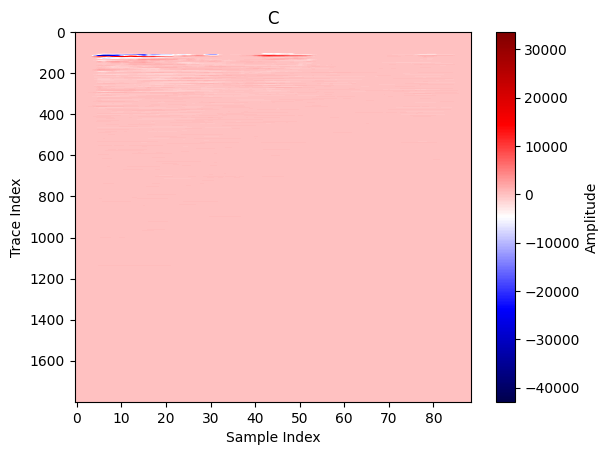

In [ ]:
# again filtering
C = medfilt(mynewdt, kernel_size=9)

plt.imshow(C.transpose(), cmap='seismic', aspect='auto') 
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('C')

In [ ]:
#C.shape
print(len(fb1))

89


Text(0.5, 1.0, 'D')

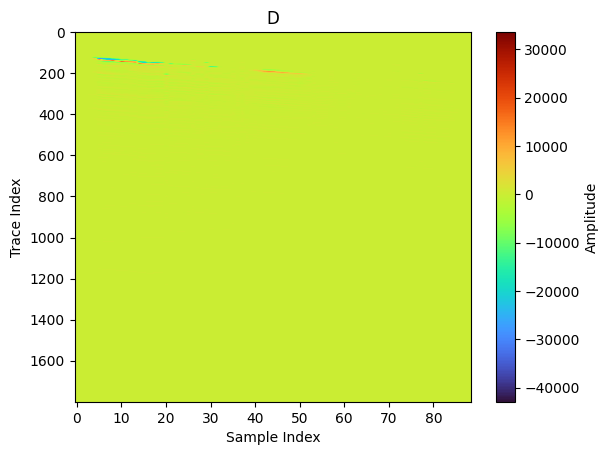

In [ ]:
mydt_C = C[:, :] # Python uses zero-based indexing
# print(len(mydt))
# print(mydt.size) 
fb1 = picked_times[19:]
# print(fb1) = 89

D = np.zeros((89, 1800))

for i in range(1, 89): # Python uses half-open intervals
    diff = abs(fb1[i] - fb1[0])
    for j in range(1800):
        D[i,j] = mydt_C[i,j - diff]

# Plot the seismic shot gather with the median filter
trace_numbers_normalized = np.arange(len(mydt_C)) / len(mydt_C)
plt.imshow(D.T, cmap='turbo', aspect='auto')
plt.colorbar(label='Amplitude')
# #plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('D')

#plt.imshow(D.transpose(), cmap='seismic', aspect='auto') #, interpolation='nearest', vmin=-5, vmax=5, origin='upper')


In [ ]:
print(D.shape)
print(filtered_data[19:,:1800].shape)

(89, 1800)
(89, 1800)


IndexError: list assignment index out of range

Text(0.5, 1.0, 'E')

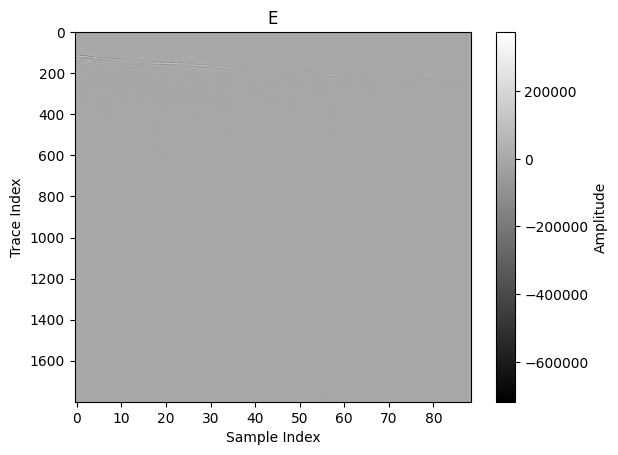

In [ ]:
mydt_D = D # Python uses zero-based indexing
# print(len(mydt))
# print(mydt.size) 
fd = filtered_data[19:,:1800]
# print(fb1) = 89

E = np.zeros((89,1800))

for i in range(0,89): # Python uses half-open intervals
    #diff = abs(fb1[i] - fb1[0])
    for j in range(1800):
        E[i,j] = mydt_D[i,j] - fd[i,j]

# Plot the seismic shot gather with the median filter
trace_numbers_normalized = np.arange(len(mydt_D)) / len(mydt_D)
plt.imshow(E.T, cmap='gray', aspect='auto')
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('E')

#plt.imshow(E.T, cmap='seismic', aspect='auto') #, interpolation='nearest', vmin=-5, vmax=5, origin='upper')

In [ ]:
mydt = Data[19:, :] # Python uses zero-based indexing
mydt
# print(len(mydt))
# print(mydt.size)
fb1 = picked_times[19:]
print(fb1)
print(len(fb1))
mynewdt = np.zeros((89, 1800))

for i in range(1, 89): # Python uses half-open intervals
    diff = abs(fb1[i] - fb1[0])
    for j in range(1800):
        mynewdt[i,j] = mydt[i,j + diff]

# Plot the seismic shot gather with the median filter
trace_numbers_normalized = np.arange(len(mydt)) / len(mydt)
plt.imshow(mydt.T, cmap='turbo', aspect='auto', interpolation='nearest', vmin=-5, vmax=5, origin='upper')
plt.colorbar(label='Amplitude')
#plt.ylim(400,0)
plt.xlabel('Sample Index')
plt.ylabel('Trace Index')
plt.title('Flatting')

plt.imshow(mynewdt.transpose(), cmap='seismic', aspect='auto') #, interpolation='nearest', vmin=-5, vmax=5, origin='upper')

# Plot picked times on the seismic shot gather
for trace_number, fb1 in enumerate(filtered_picked_times):
    plt.axhline(y=picked_time, xmin=((trace_number) / len(filtered_data)), xmax=(trace_number + 1) / len(filtered_data),
                color='pink', linestyle='-', linewidth=3)


# # Plot picked times on the seismic shot gather
# for fb1 in enumerate(mynewdt):
#     plt.axhline(y=fb1, xmin=90 / len(mynewdt), xmax=(90 + 1) / len(mynewdt),
#                 color='blue', linestyle='-', linewidth=2)

plt.show()